<a href="https://colab.research.google.com/github/vsaathwika0904/hds5210-2023/blob/main/week09/week09_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above. It will only work with these files.

---
---

### 41.1 Loading and viewing the data

Here is URL to sample file for Baptist Health:
* https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx'

data = pd.read_excel(url, sheet_name='Sheet1', skiprows=3)

In [22]:
data.shape

(3864, 19)

In [23]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [24]:
data.head()

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

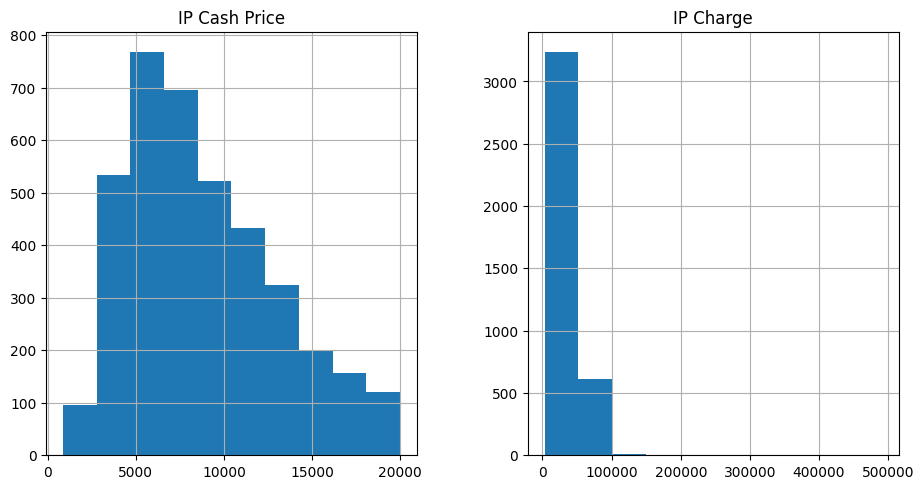

In [25]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

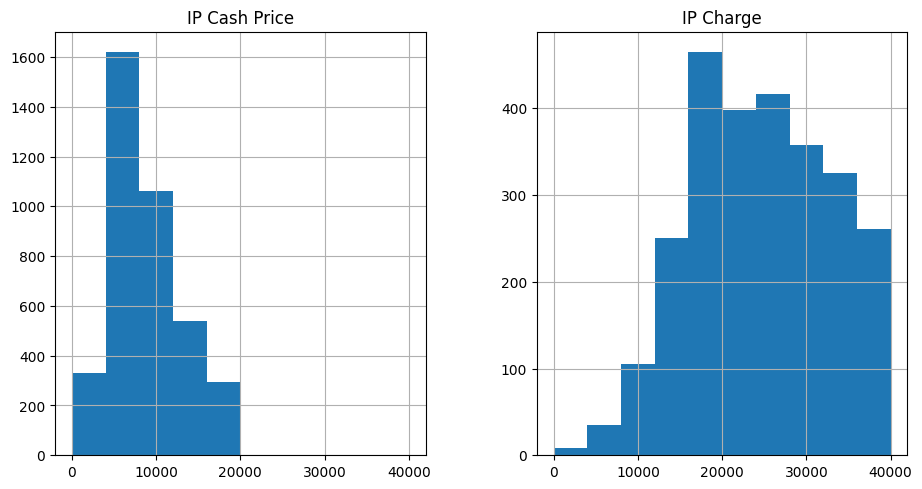

In [26]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

In [27]:
high_cost_filter = data['IP Charge'] > 100000
data.loc[high_cost_filter]

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
800,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ALLWELL [15100],120026.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
858,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ALLWELL [15100],102435.46,16684.09,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
934,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 461,NaN,NaN,MS461,Bilateral Or Multiple Major Joint Procedures O...,1,ALLWELL [15100],121126.29,NaN,8741.25,9225.00,NaN,0,NaN,NaN,NaN,NaN
1171,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 802,NaN,NaN,MS802,Other O.R. Procedures Of The Blood And Blood F...,1,ALLWELL [15100],143667.09,NaN,9725.00,10204.12,10204.12,0,NaN,NaN,NaN,NaN
1264,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ALLWELL [15100],480809.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN
1945,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 037,NaN,NaN,MS037,Extracranial Procedures With McC,1,ARKANSAS TOTAL CARE [40700],123035.47,NaN,17816.08,39275.00,17816.08,0,NaN,NaN,NaN,NaN
2091,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ARKANSAS TOTAL CARE [40700],121981.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2138,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 333,NaN,NaN,MS333,Rectal Resection With Cc,1,ARKANSAS TOTAL CARE [40700],128929.41,NaN,12824.58,26704.23,15975.34,0,NaN,NaN,NaN,NaN
2149,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ARKANSAS TOTAL CARE [40700],104304.46,NaN,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
2192,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 408,NaN,NaN,MS408,Biliary Tract Procedures Except Only Cholecyst...,1,ARKANSAS TOTAL CARE [40700],108898.78,NaN,19861.16,22240.28,19861.16,0,NaN,NaN,NaN,NaN


### Question:

**What do you observe from the histograms above?**

### YOUR RESPONSE: According to the two histograms comparing the IP Cash Price and the IP Charge:

The IP Cash Price distribution is biased towards the right, with the majority of values placed on the left at lower prices, but a long tail extending towards higher prices.
The distribution of IP Charge, on the other hand, is more normal/bell-shaped, with a roughly even spread of charges across the range.
The IP Cash Price histogram peaks around $10,000 - $15,000, while the IP Charge histogram rises around $100,000 - $150,000.
As a result, the IP Charges are significantly higher than the corresponding IP Cash Prices for the same procedures in general. The space between the two distributions represents this gap.
Some procedures have IP Charges of more than $400,000, but cash prices have been set at around $20,000 due to the filter. The gap between charges and cash prices would be even wider if this limit did not exist.
This demonstrates that the hospital's chargemaster rates are significantly inflated when compared to the actual cash prices they are willing to accept from uninsured patients.
Insured patients benefit from insurance company-negotiated contracted reimbursement rates, whereas uninsured patients pay a much lower cash price for the same procedures.

In summary, the histograms depict the gap between raised chargemaster rates and lower cash prices, highlighting the "charge to cost ratio" that critics frequently cite in discussions about healthcare costs and price transparency reforms. The cash price more accurately represents the true economic cost than the chargemaster rates.




---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

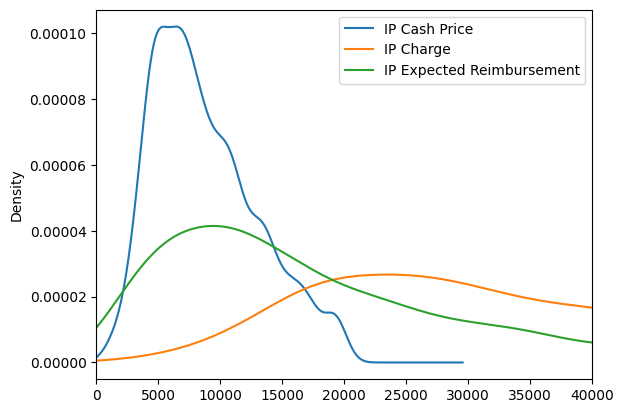

In [28]:

graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

### YOUR RESPONSE: The KDE charts displaying the IP Cash Price, IP Charge, and IP Expected Reimbursement distributions provide various crucial information. The IP Cash Price paid by uninsured individuals is often lower on average, with a peak around $10,000. This implies that the majority of medical procedures cost less than $10,000 when paid for out of pocket. The IP Charge, on the other hand, represents the sum billed to insurance companies and normally ranges between $20,000 and $30,000. This suggests that hospitals frequently charge insurance companies more rates than uninsured customers who pay cash.
Additionally, the IP Expected Reimbursement, representing what hospitals anticipate receiving from insurance companies, peaks at around $15,000 to $20,000. This is notably lower than the billed charges, showcasing the insurance companies' ability to negotiate discounts. In essence, insured patients tend to benefit from paying less out of pocket on average when compared to uninsured individuals, thanks to these negotiated discounts.
There's a distinct gap between the amount billed to insurance and the negotiated reimbursed amount. This gap underscores the discounts that insurance companies can secure through their contracted rates, ultimately reducing costs for insured patients. In sum, these plots vividly illustrate the significant variations in charges and payments between insured and uninsured patients and highlight the influential role of insurance companies in negotiating lower prices through their contractual agreements with healthcare providers.


I see the brilliance behind this data.

---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [29]:
data['Payer'].value_counts()

ALLWELL [15100]                      650
ARKANSAS TOTAL CARE [40700]          650
AETNA [65000]                        641
AR BLUE CROSS BLUE SHIELD [25001]    641
HEALTHSCOPE [95700]                  641
MULTIPLAN                            641
Name: Payer, dtype: int64

In [30]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

Payer
AETNA [65000]                        372
ALLWELL [15100]                      519
AR BLUE CROSS BLUE SHIELD [25001]    450
ARKANSAS TOTAL CARE [40700]          404
HEALTHSCOPE [95700]                  641
MULTIPLAN                            641
Name: IP Expected Reimbursement, dtype: int64

Payer
AETNA [65000]                        Axes(0.125,0.11;0.775x0.77)
ALLWELL [15100]                      Axes(0.125,0.11;0.775x0.77)
AR BLUE CROSS BLUE SHIELD [25001]    Axes(0.125,0.11;0.775x0.77)
ARKANSAS TOTAL CARE [40700]          Axes(0.125,0.11;0.775x0.77)
HEALTHSCOPE [95700]                  Axes(0.125,0.11;0.775x0.77)
MULTIPLAN                            Axes(0.125,0.11;0.775x0.77)
Name: IP Expected Reimbursement, dtype: object

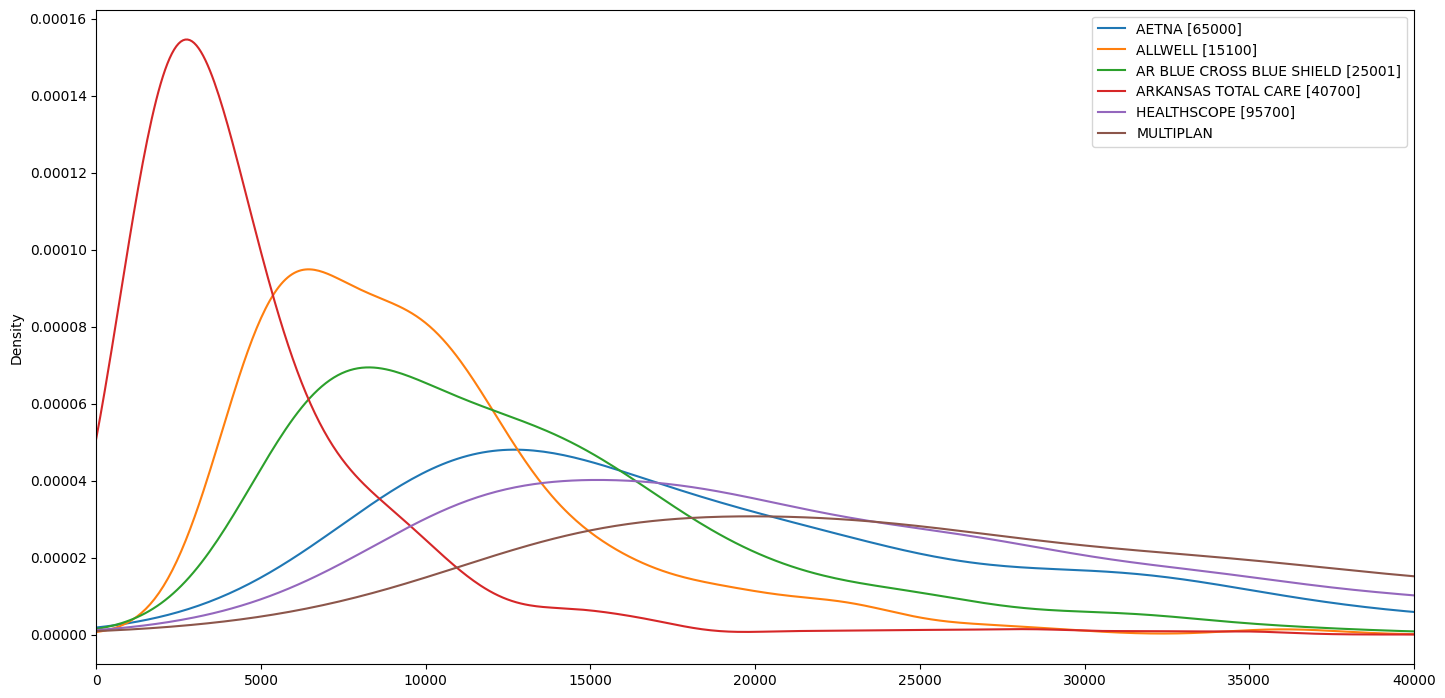

In [31]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


### YOUR RESPONSE:
Based on the KDE plots of expected reimbursements by payer, I observe:
The ALLWELL and ARKANSAS TOTAL CARE plans have distributions shifted more to the left compared to the other plans, with peaks around $5,000-$10,000. This indicates these plans tend to have lower reimbursement amounts overall.
The AETNA, AR BLUE CROSS BLUE SHIELD, and MULTIPLAN plans have distributions centred further to the right, with peaks around $10,000-$20,000. So these plans tend to reimburse at higher amounts.
The HEALTHSCOPE plan has a flatter, more uniform distribution, though still centred on the higher end around $15,000-$20,000.
This tells me that the ALLWELL and ARKANSAS TOTAL CARE plans likely have lower contracted rates with the hospitals compared to the other plans. They are able to negotiate lower reimbursements for the same procedures and charges. The other plans seem to reimburse at similar, higher levels. So they have less negotiating power compared to ALLWELL and ARKANSAS TOTAL CARE when it comes to bringing down the amounts they will cover and pay out. The plan a patient has makes a significant difference in how much the insurance company will pay the hospital.



---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

<Axes: xlabel='IP Charge', ylabel='IP Expected Reimbursement'>

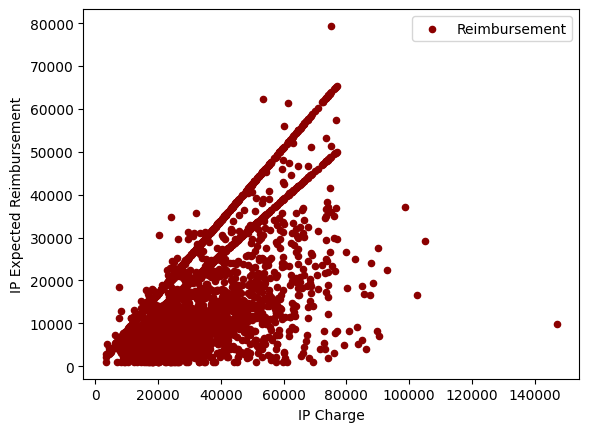

In [32]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

<ipython-input-33-7b284550e202>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (payer, prices) in enumerate(groups):


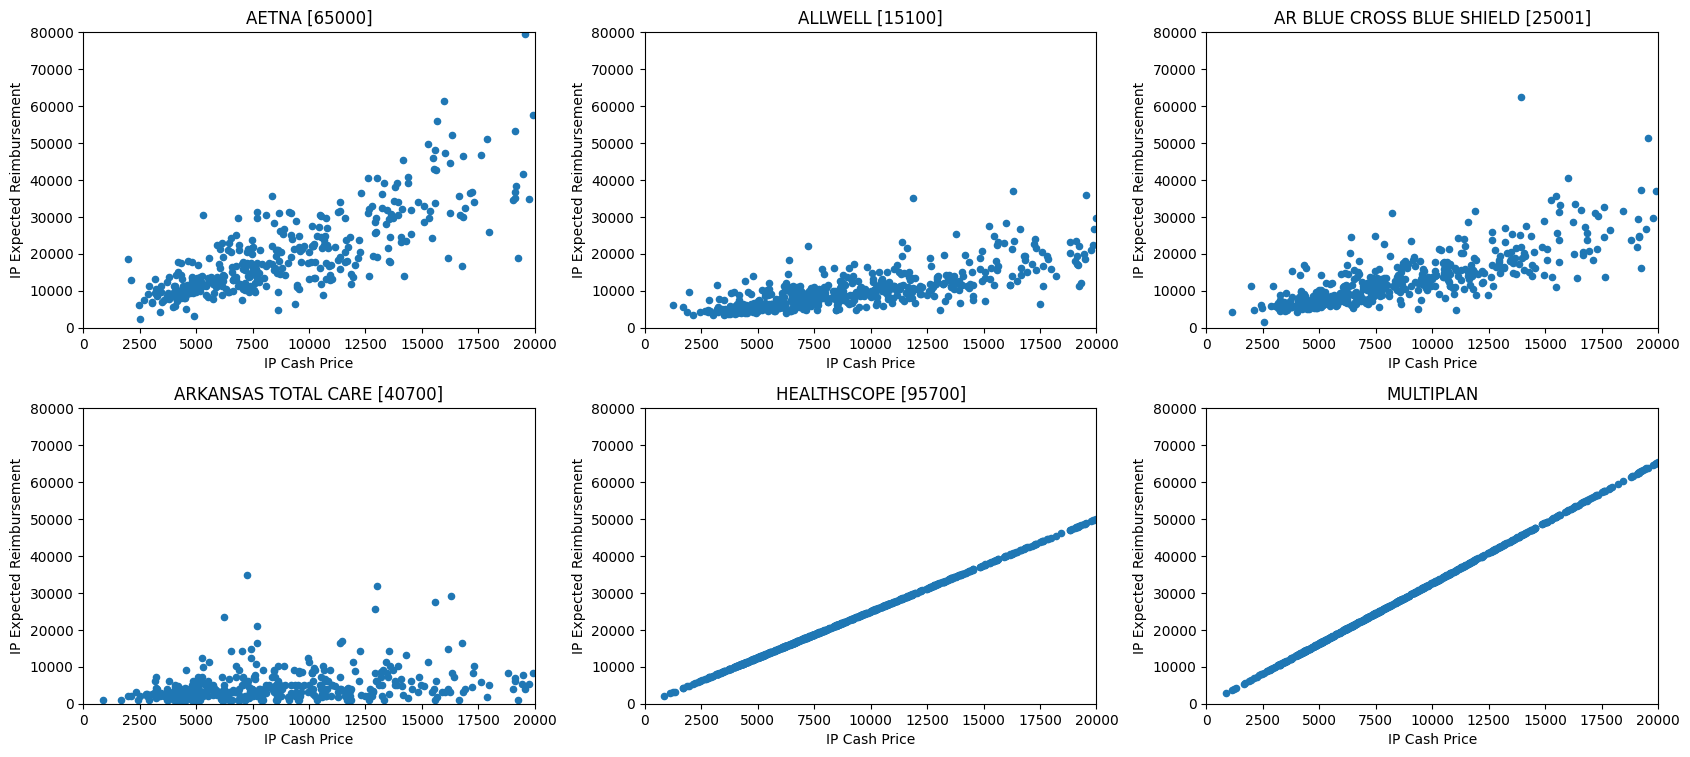

In [33]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

### YOUR RESPONSE:



---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/insurance (2).csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [35]:
print("Shape of the dataset:", df)

Shape of the dataset:       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [36]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (1338, 7)


In [37]:
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Check data types and look for null values
print("\nData types and null values:")
print(df.info())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())


First few rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Data types and null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Summary statistics:
         

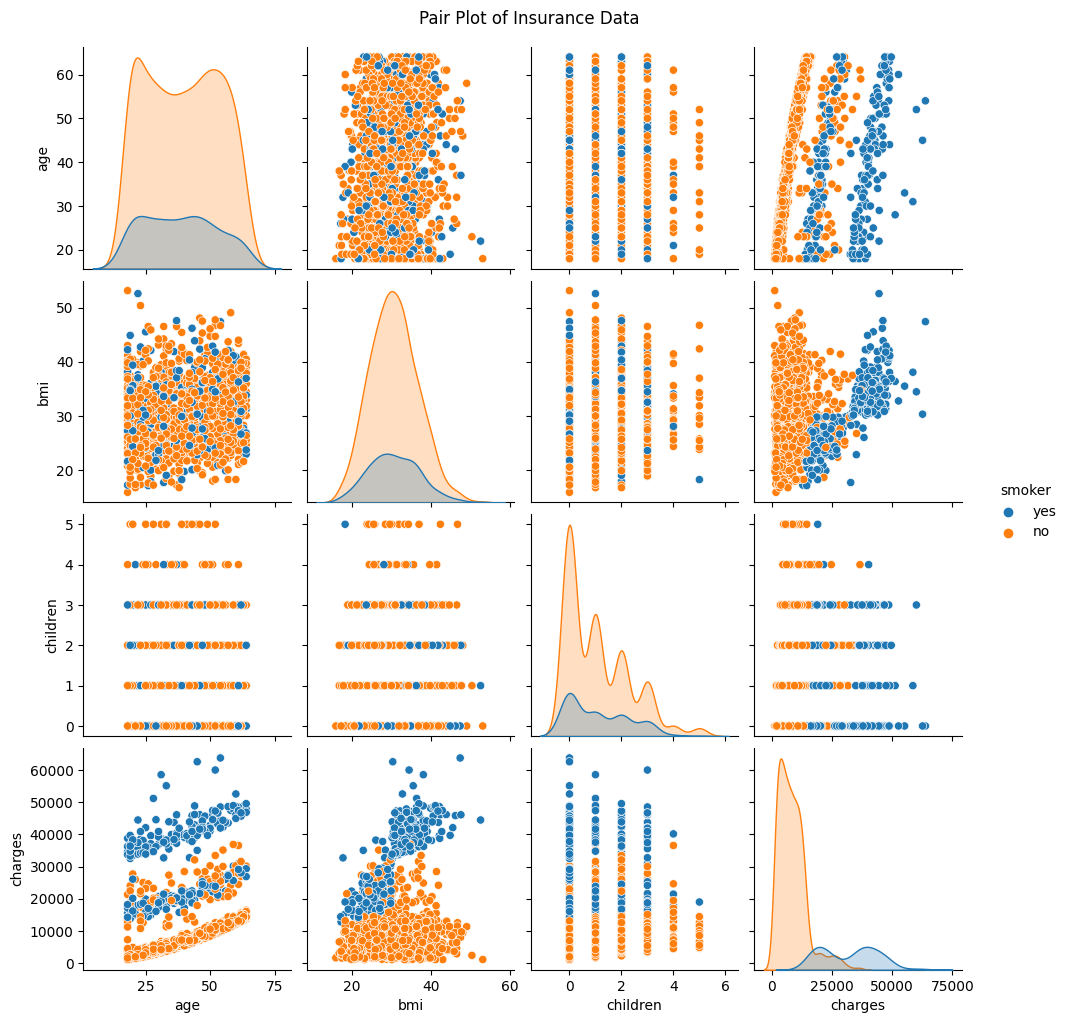

In [38]:
# Create a pair plot to visualize relationships between numerical variables
sns.pairplot(df, hue='smoker', diag_kind='kde')
plt.suptitle('Pair Plot of Insurance Data', y=1.02)
plt.show()

### Observations #1
The above graphs show the combinations of various pair plots of insurance data

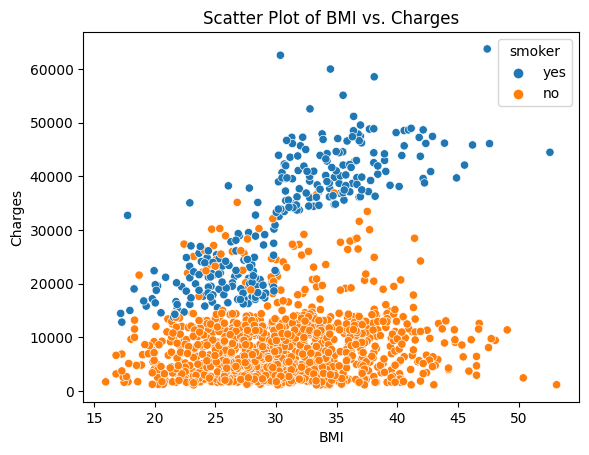

In [39]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('Scatter Plot of BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

### Observations #2
The above graph shows the scatter plot between the BMI vs the charges and weather the person is a smoker or not.



---



## Submitting Your Work

As usual, submit your work using the "Save to GitHub" option